In [1]:
#!pip install PyGSP

In [2]:
import networkx as nx
import numpy as np

import holoviews as hv; hv.extension('bokeh', 'plotly', 'matplotlib', logo=False)
import panel as pn;     pn.extension('plotly', 'katex', 'mathjax')

from alg_graphs.alg_graphs import pr, format_matrix, draw_nxgraph, stem_plot

import matplotlib.pyplot as plt
from matplotlib.figure import Figure   # <- necessary to use panel!

%matplotlib inline
from pygsp import graphs, filters, plotting

<div style="float:center;width:100%;text-align: center;"><strong style="height:60px;color:darkred;font-size:40px;">The Python Graph Signal Processing Library (PyGSP)</strong></div>

The [**PyGSP**](https://pygsp.readthedocs.io/en/stable/index.html) facilitates a wide variety of operations on graphs,
like computing their Fourier basis, filtering or interpolating signals, plotting graphs, signals, and filters.

* [**The Emerging Field of Signal Processing on Graphs**](https://arxiv.org/pdf/1211.0053.pdf)
* [**Calculus on finite weighted graphs**](https://en.wikipedia.org/wiki/Calculus_on_finite_weighted_graphs)
* [**Graph Signal Processing Tutorial**](https://github.com/mdeff/pygsp_tutorial_graphsip)

<strong style="font-size:20px;height:25px;color:blue;">Example Graph with (sparse) adjacency matrix and weight</strong>

Row
    [0] Matplotlib(Figure, dpi=96, height=250)
    [1] Column
        [0] Spacer(height=20)
        [1] LaTeX(str)
    [2] Spacer(width=20)
    [3] Column
        [0] Spacer(height=20)
        [1] LaTeX(str)
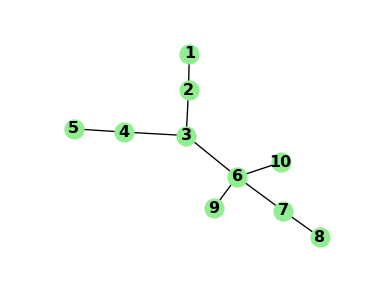

In [3]:
G = nx.Graph() 
G.add_edges_from( [(1, 2), (2, 3), (3, 4), (4, 5), (3, 6), (6, 7,), (7, 8), (6, 9), (6, 10)] )
A = nx.adjacency_matrix(G)

g = graphs.Graph(A)
pr("Example Graph with (sparse) adjacency matrix and weight")
pn.Row( pn.pane.Matplotlib( draw_nxgraph(G), dpi=96,  height=250),
        pn.Column(pn.Spacer(height=20), pn.pane.LaTeX( 'A(G) = $'+format_matrix(  A.todense())+'$' )), pn.Spacer(width=20),
        pn.Column(pn.Spacer(height=20), pn.pane.LaTeX( 'W(G) = $'+format_matrix(np.array(g.W.todense()))+'$' )),
      )

In [4]:
pr( "The Laplacian of the Graph is given by" )
lap = g.L
pn.pane.LaTeX( 'L(G) = $'+format_matrix(np.array(lap.todense()).astype(int), environment='array')+'$' )

<strong style="font-size:20px;height:25px;color:blue;">The Laplacian of the Graph is given by</strong>

LaTeX(str)

In [ ]:
g.set_coordinates('ring2D')

fig, ax =  plt.subplots(figsize=(4,3))
_ = g.plot(ax=ax)

In [ ]:
pr( "Use the PuGSP display routine, and show the Laplacian")
pn.Row( pn.pane.Matplotlib( fig, dpi=96,  height=250),
        pn.Column(pn.Spacer(height=20), pn.pane.LaTeX( 'A(G) = $'+format_matrix(np.array(lap.todense()).astype(int), environment='array')+'$' )));

<div style="background-color:#F2F5A9;color:black;">

The graph **Fourier transform** is a mathematical transform which eigendecomposes the Laplacian matrix of a graph into eigenvalues and eigenvectors.
</div>

In [6]:
g.compute_fourier_basis()
from panel.interact import interact
interact( lambda i: stem_plot( g.U[:,i]).opts(width=400, title=f"Fourier Basis Vector {i+1}"), i=(0,g.U.shape[0]-1))

Column(sizing_mode='fixed')
    [0] Column
        [0] IntSlider(end=9, name='i', value=4)
    [1] Row(sizing_mode='fixed')
        [0] HoloViews(Overlay, height=300, name='interactive01965', sizing_mode='fixed', width=400)

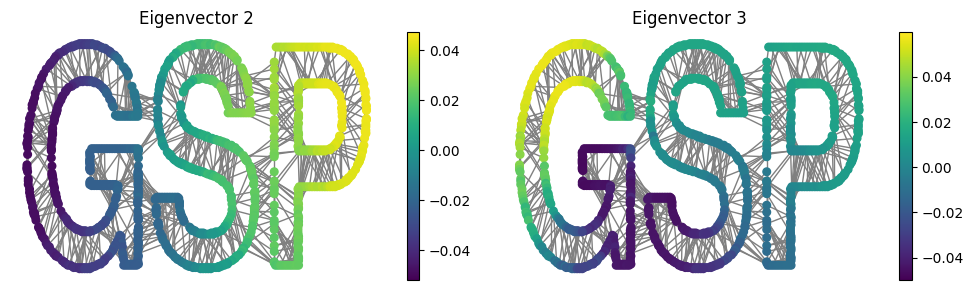

In [7]:
G = graphs.Logo()
G.compute_fourier_basis()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for i, ax in enumerate(axes):
     G.plot_signal(G.U[:, i+1], vertex_size=30, ax=ax)
     _ = ax.set_title('Eigenvector {}'.format(i+2))
     ax.set_axis_off()
_ = fig.tight_layout()
pn.Row( pn.pane.Matplotlib( fig, dpi=96,  height=250));

In [8]:
interact( lambda i: stem_plot( G.U[:,i], i).opts(width=800, title=f"Fourier Basis Vector {i+1}"), i=(0,G.U.shape[0]-1))

Column(sizing_mode='fixed')
    [0] Column
        [0] IntSlider(end=1129, name='i', value=564)
    [1] Row(sizing_mode='fixed')
        [0] HoloViews(Overlay, height=300, name='interactive02543', sizing_mode='fixed', width=800)

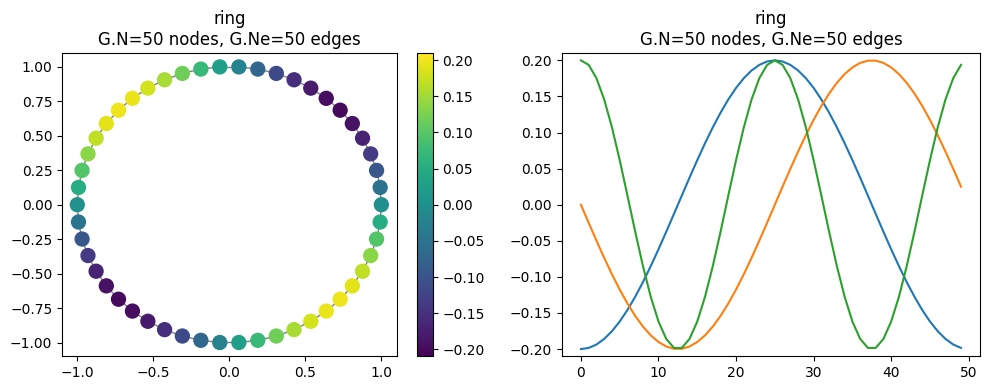

In [9]:
G2 = graphs.Ring(N=50)
G2.compute_fourier_basis()
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
G2.plot_signal(G2.U[:, 4], ax=axes[0])
G2.set_coordinates('line1D')
G2.plot_signal(G2.U[:, 1:4], ax=axes[1])
fig.tight_layout()
pn.Row( pn.pane.Matplotlib(fig), width=500);

In [10]:
interact( lambda i: stem_plot( G2.U[:,i]).opts(width=800, title=f"Fourier Basis Vector {i+1}"), i=(0,G2.U.shape[0]-1))

Column(sizing_mode='fixed')
    [0] Column
        [0] IntSlider(end=49, name='i', value=24)
    [1] Row(sizing_mode='fixed')
        [0] HoloViews(Overlay, height=300, name='interactive37894', sizing_mode='fixed', width=800)